In [33]:
import pandas as pd
from bayes import *

In [88]:
datA = pd.read_csv('./DatA.csv')
datA.head()

,Personas,Tiempo TOTAL,Unnamed: 2,Buscador,Filtro,Cesta,Unnamed: 6,Unnamed: 7
0,1,1:10.89,0,1,0,1,NaN,NaN
1,2,1:01.02,0,1,0,0,NaN,NaN
2,3,0:41.55,1,1,0,0,NaN,0:42:00
3,4,0:37.29,1,1,0,1,NaN,NaN
4,5,0:42.46,0,1,0,1,NaN,NaN


In [89]:
datA = datA.drop(['Unnamed: 6', 'Unnamed: 7'], axis=1)

In [90]:
datA.head()

,Personas,Tiempo TOTAL,Unnamed: 2,Buscador,Filtro,Cesta
0,1,1:10.89,0,1,0,1
1,2,1:01.02,0,1,0,0
2,3,0:41.55,1,1,0,0
3,4,0:37.29,1,1,0,1
4,5,0:42.46,0,1,0,1


In [91]:
datA = datA.rename(columns = {'Unnamed: 2': 'TiempoBin'})

In [92]:
datA = datA.drop(['Filtro'], axis=1)

In [93]:
datA.head()

,Personas,Tiempo TOTAL,TiempoBin,Buscador,Cesta
0,1,1:10.89,0,1,1
1,2,1:01.02,0,1,0
2,3,0:41.55,1,1,0
3,4,0:37.29,1,1,1
4,5,0:42.46,0,1,1


# Análisis de Tiempo
---
Vamos a analizar las impresiones frente conversiones

In [94]:
datA_vc = datA['TiempoBin'].value_counts()
datA_vc

TiempoBin
1    17
0    13
Name: count, dtype: int64

## Explicación
---

Sobre la media que es 0:42 seg, tenemos 17 que convierten antes de la media y 13 que tardan más de la media en convertir

In [96]:
imps_contA = datA['Personas'].count()
convsA = datA[datA['TiempoBin'] == 1]
convs_contA = convsA['TiempoBin'].count()
imps_contA, convs_contA

(30, 17)

In [97]:
CR_ctrl_Time = convs_contA/imps_contA
CR_ctrl_Time

0.5666666666666667

Nuestra tasa de conversión es de 0.56

In [128]:
a_C, b_C = 1+convs_cont, 1+imps_contA-convs_cont
beta_control_tiempo = beta(a_C, b_C)

In [129]:
beta_control_tiempo.mean()

0.5625

Se confirma con Bayes una tasa del 0.56

# Análisis de Buscador
---

Vamos a analizar uso de buscador frente a categorías

In [103]:
datA_bus = datA['Buscador'].value_counts()
datA_bus

Buscador
1    23
0     7
Name: count, dtype: int64

## Explicación
---

Nos interesa saber la importancia que tiene el buscador y que porcentaje de gente lo usa para llegar al producto

In [110]:
convs_busA = datA[datA['Buscador'] == 1]
convs_bus_cont = convs_busA['Buscador'].count()
imps_contA, convs_bus_cont

(30, 23)

In [105]:
CR_bus_ctrl = convs_bus_cont/imps_contA
CR_bus_ctrl

0.7666666666666667

Nuestra tasa de uso de buscador es de 0.76

In [130]:
c_C, d_C = 1+convs_bus_cont, 1+imps_cont-convs_bus_cont
beta_control_bus = beta(c_C, d_C)

In [131]:
beta_control_bus.mean()

0.75

Se confirma con Bayes una tasa del 0.75

# Análisis de Cesta
---
Vamos a analizar el uso de la cesta frente al pago ya

In [108]:
datA_ces = datA['Cesta'].value_counts()
datA_ces

Cesta
1    16
0    14
Name: count, dtype: int64

## Explicación
---

Nos interesa saber cuanta gente utiliza el pago ya frente a la cesta de la compra

In [111]:
convs_cesA = datA[datA['Cesta'] == 1]
convs_ces_cont = convs_cesA['Cesta'].count()
imps_contA, convs_ces_cont

(30, 16)

In [132]:
CR_ces_ctrl = convs_ces_cont/imps_contA
round(CR_ces_ctrl, 5)

0.53333

Nuestra tasa de uso de buscador es de 0.53

In [133]:
e_C, f_C = 1+convs_ces_cont, 1+imps_contA-convs_ces_cont
beta_control_cesta = beta(e_C, f_C)

In [134]:
beta_control_cesta.mean()

0.53125

Se confirma con Bayes una tasa del 0.53

# Test B
---

In [166]:
datB = pd.read_csv('./DatB.csv')
datB.head()

,Personas,Tiempo TOTAL,Unnamed: 2,Buscador,Cesta
0,1,0:43,1,0,0
1,2,0:37,1,0,0
2,3,0:38,1,0,0
3,4,0:29,1,0,0
4,5,0:16,1,0,0


In [167]:
datB = datB.rename(columns = {'Unnamed: 2': 'TiempoBin'})

# Análisis de Tiempo
---
Vamos a analizar las impresiones frente conversiones

In [169]:
datB_vc = datB['TiempoBin'].value_counts()
datB_vc

TiempoBin
1    15
0    15
Name: count, dtype: int64

## Explicación
---

Sobre la media que es 0:46 seg, tenemos 15 que convierten antes de la media y 15 que tardan más de la media en convertir

In [170]:
imps_testB = datB['Personas'].count()
convs_test = datB[datB['TiempoBin'] == 1]
convs_test = convs_test['TiempoBin'].count()
imps_testB, convs_test

(30, 15)

In [171]:
CR_test = convs_test/imps_testB
CR_test

0.5

In [172]:
g_C, h_C = 1+convs_test, 1+imps_testB-convs_test
beta_test_tiempo = beta(g_C, h_C)

In [173]:
beta_test_tiempo.mean()

0.5

Se confirma con Bayes una tasa del 0.5

# Análisis de Buscador
---

Vamos a analizar uso de buscador frente a categorías

In [174]:
datB_bus = datB['Buscador'].value_counts()
datB_bus

Buscador
0    20
1    10
Name: count, dtype: int64

In [175]:
convs_bus_B = datB[datB['Buscador'] == 1]
convs_bus_test = convs_bus_B['Buscador'].count()
imps_testB, convs_bus_test

(30, 10)

In [176]:
CR_bus_test = convs_bus_test/imps_testB
CR_bus_test

0.3333333333333333

In [177]:
i_C, j_C = 1+convs_bus_test, 1+imps_testB-convs_bus_test
beta_test_bus = beta(i_C, j_C)

In [178]:
beta_test_bus.mean()

0.34375

# Análisis de Cesta
---
Vamos a analizar el uso de la cesta frente al pago ya

In [179]:
datB_ces = datB['Cesta'].value_counts()
datB_ces

Cesta
0    27
1     3
Name: count, dtype: int64

In [180]:
convs_ces_B = datB[datB['Cesta'] == 1]
convs_ces_test = convs_ces_B['Cesta'].count()
imps_testB, convs_ces_test

(30, 3)

In [181]:
CR_ces_test = convs_ces_test/imps_testB
round(CR_ces_test, 5)

0.1

In [182]:
k_C, l_C = 1+convs_ces_test, 1+imps_testB-convs_ces_test
beta_test_cesta = beta(k_C, l_C)

In [183]:
beta_test_cesta.mean()

0.125

# Análisis de confianza
---

### Tiempo

In [184]:
calc_prob(beta_control_tiempo, beta_test_tiempo)

0.6944355167509754

In [185]:
salto = (beta_test_tiempo.mean() - beta_control_tiempo.mean()) / beta_control_tiempo.mean()
salto*100

-11.11111111111111

### Conclusión Tiempo
---

Con los cambios realizados en el test b, se reduce el tiempo en un 11% con una probabilidad del 69.44%

### Buscador

In [186]:
calc_prob(beta_control_bus, beta_test_bus)

0.9996198759710462

In [187]:
salto = (beta_test_bus.mean() - beta_control_bus.mean()) / beta_control_bus.mean()
salto*100

-54.166666666666664

### Conclusión Buscador
---

Con los cambios realizados en el test b, se reduce el numero de veces que usan el buscador en un 54% con una probabilidad del 99.96%

### Cesta

In [188]:
calc_prob(beta_control_cesta, beta_test_cesta)

0.9998596246607286

In [189]:
salto = (beta_test_cesta.mean() - beta_control_cesta.mean()) / beta_control_cesta.mean()
salto*100

-76.47058823529412

### Conclusión Cesta
---

Con los cambios realizados en el test b, se reduce el numero de veces que usan el buscador en un 76% con una probabilidad del 99.98%

# Gráficos
---

In [190]:
def plot(betas, names, linf=0, lsup=0.006):
    x=np.linspace(linf, lsup, 100)
    for f, n in zip(betas, names):
        y=f.pdf(x)
        y_pico=pico(f.args[0], f.args[1])
        y_var=f.var()
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(n, y_pico, y_var))
        plt.yticks([])
    plt.legend()
    plt.show();

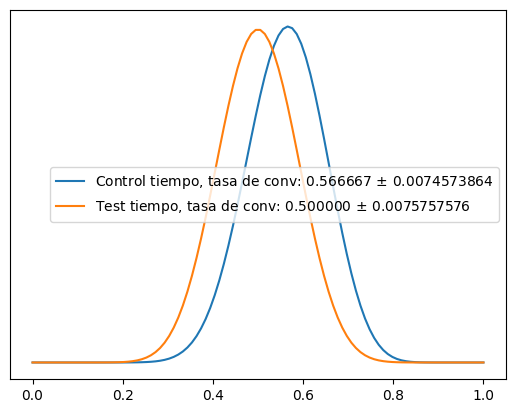

In [197]:
plot([beta_control_tiempo, beta_test_tiempo], ['Control tiempo', 'Test tiempo'], linf=0, lsup=1)

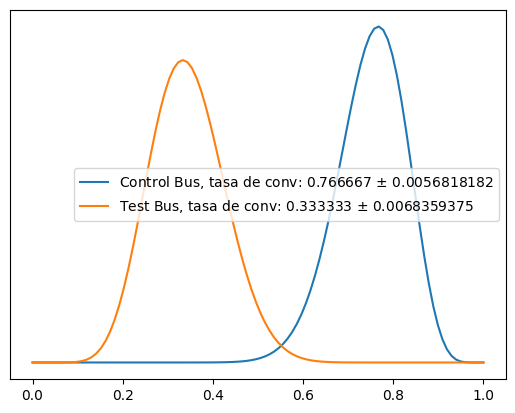

In [196]:
plot([beta_control_bus, beta_test_bus], ['Control Bus', 'Test Bus'], linf=0, lsup=1)

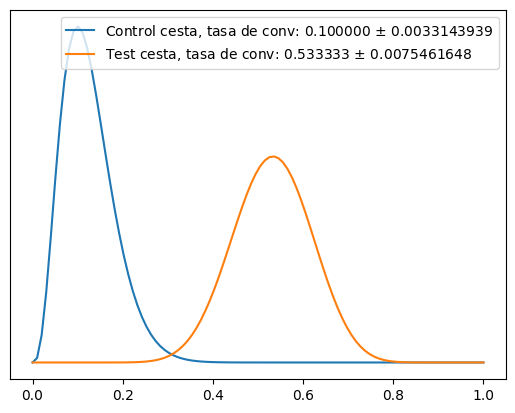

In [201]:
plot([beta_test_cesta, beta_control_cesta], ['Control cesta', 'Test cesta'], linf=0, lsup=1)